# 📌 Extração (E - Extract)

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

df = pd.read_json(url)

In [ ]:
#normalizando colunas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [ ]:
#concatenação das colunas
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df_final.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [ ]:
for col in df_final.select_dtypes(include='object').columns:
    print(df_final[col].unique())
# verificação de inconsistenciaas

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
['No' 'Yes' '']
['Female' 'Male']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [ ]:
df_final.info()# aqui faço a verificação para ver o tipo das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_final.isna().sum() # verificação de valores ausentes

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


# 🔧 Transformação (T - Transform)

In [ ]:
import numpy as np

In [ ]:
#tratando espaços em branco, valores vazios e alterando o tipo de dado

df_final['Charges.Total'] = df_final['Charges.Total'].astype(str).str.strip().replace('', np.nan)
df_final['Charges.Total'] = df_final['Charges.Total'].astype(np.float64)

In [ ]:
df_final['Churn'] = df_final['Churn'].str.strip()
df_final['Churn'] = df_final['Churn'].replace('', np.nan)
df_final = df_final.dropna(subset=['Churn'])

In [ ]:
df_final['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_final.columns # colunas fora do padrão de escrita

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
df_final.columns = df_final.columns.str.lower().str.replace('.', '_', regex=False) # padronizando a escrita

In [ ]:
df_final['contas_diarias'] = (df_final['charges_monthly']/30).round(2)# criação da nova coluna com gastos diarios
df_final.head(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46


In [ ]:
df_final = df_final.rename(columns={'customerid': 'id_cliente' , 'gender': 'genero', 'seniorcitizen':'idoso', 'partner': 'parceria', 'dependents':'dependentes',
                   'tenure':'meses_contrato', 'phoneservice':'assina_telefone', 'multiplelines':'multiplas_linhas', 'internetservice':'servico_internet',
                   'onlinesecurity':'assina_segurança', 'onlinebackup':'assina_backup', 'deviceprotection':'protecao_dispositivo', 'techsupport':'assina_suporte',
                   'streamingtv': 'tv_cabo', 'streamingmovies':'assina_filmes', 'contract':'contrato', 'paperlessbilling':'fatura_online', 'paymentmethod':'metodo_pagamento',
                   'charges_monthly':'total_mes',
       'charges_total':'total_gastos'})
df_final.head(3) # renomeando as colunas

,id_cliente,churn,genero,idoso,parceria,dependentes,meses_contrato,assina_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,assina_suporte,tv_cabo,assina_filmes,contrato,fatura_online,metodo_pagamento,total_mes,total_gastos,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46


In [ ]:
df_final['genero'] = df_final['genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
df_final['contrato'] = df_final['contrato'].replace({'Month-to-month': 'Mensal', 'One year': 'Anual', 'Two year': '2 anos'})
df_final['metodo_pagamento'] = df_final['metodo_pagamento'].replace({'Electronic check': 'Cheque-eletronico', 'Mailed check': 'Cheque-enviado', 'Bank transfer (automatic)': 'Transferência bancária', 'Credit card (automatic)': 'Cartão de crédito'})
df_final['servico_internet'] = df_final['servico_internet'].replace({'Fiber optic': 'Fibra ótica'})
#fazendo a tradução

In [ ]:
colunas_binarias = ['churn','parceria','dependentes','assina_telefone','multiplas_linhas','assina_segurança',
                    'assina_backup','protecao_dispositivo','assina_suporte','tv_cabo','assina_filmes','fatura_online']


In [ ]:
df_final[colunas_binarias] = df_final[colunas_binarias].replace({'Yes':1 , 'No': 0})

/tmp/ipython-input-17-3378893889.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[colunas_binarias] = df_final[colunas_binarias].replace({'Yes':1 , 'No': 0})


In [ ]:
df_final.head(2)

,id_cliente,churn,genero,idoso,parceria,dependentes,meses_contrato,assina_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,assina_suporte,tv_cabo,assina_filmes,contrato,fatura_online,metodo_pagamento,total_mes,total_gastos,contas_diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque-enviado,65.6,593.3,2.19
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mensal,0,Cheque-enviado,59.9,542.4,2.00


# 📊 Carga e Análise (L - Load & Analysis)

In [ ]:
media_mensal = df_final['total_mes'].mean()
media_total = df_final['total_gastos'].mean()
print(f'media mensal {media_mensal :.2f}')
print(f'media total {media_total:.2f}')


media mensal 64.76
media total 2283.30


In [ ]:
mediana_mensal = df_final['total_mes'].median()
mediana_total = df_final['total_gastos'].median()
print(f'mediana mensal {mediana_mensal :.2f}')
print(f'mediana total {mediana_total:.2f}')


mediana mensal 70.35
mediana total 1397.47


In [ ]:
desvio_padrao_mensal = df_final['total_mes'].std()
desvio_padrao_total = df_final['total_gastos'].std()
print(f'desvio padrão mensal {desvio_padrao_mensal :.2f}')
print(f'desvio padrão total {desvio_padrao_total:.2f}')

desvio padrão mensal 30.09
desvio padrão total 2266.77


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


/tmp/ipython-input-23-122619348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='churn', palette=['skyblue', 'salmon'])


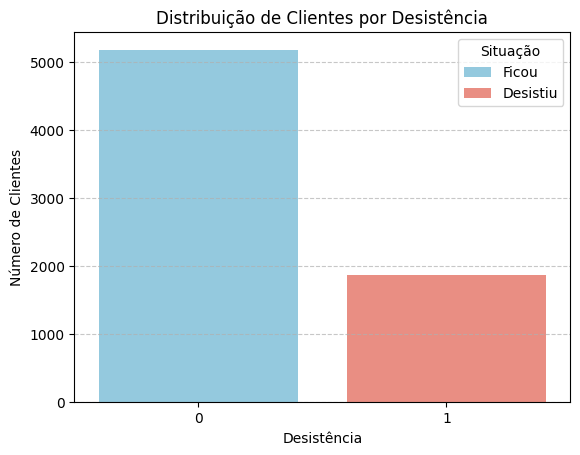

churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df_final, x='churn', palette=['skyblue', 'salmon'])
plt.title('Distribuição de Clientes por Desistência')
plt.xlabel('Desistência')
plt.ylabel('Número de Clientes')
plt.legend(title='Situação', labels=['Ficou', 'Desistiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

churn_counts = df_final['churn'].value_counts()
churn_percentual = df_final['churn'].value_counts(normalize=True) * 100

print(churn_percentual)


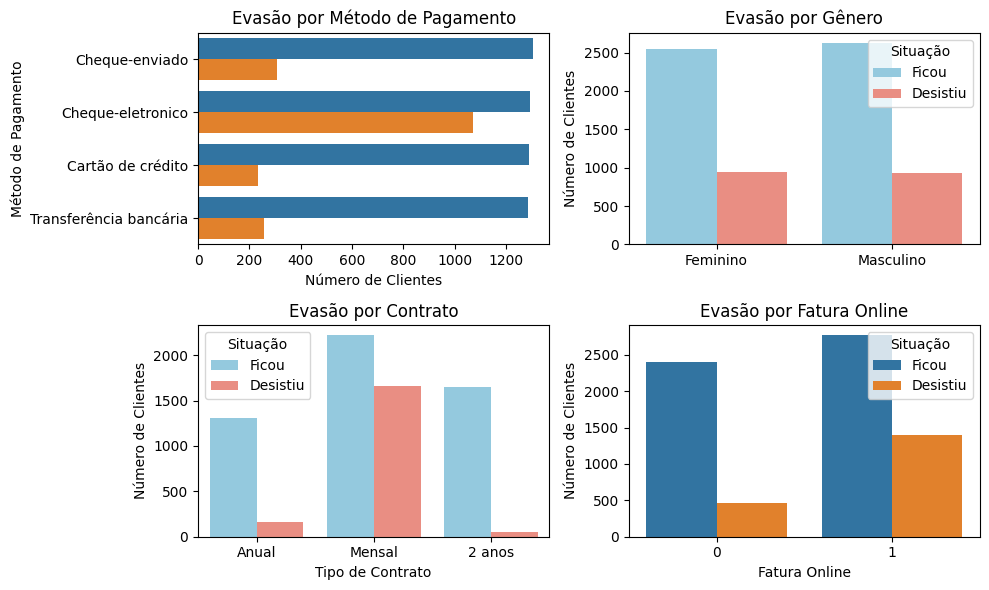

In [ ]:
#aqui eu crio 4 graficos para vizualizar a quantidade de desistencias por genero , pagamento,contrato e fatura online
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.countplot(data=df_final, y='metodo_pagamento', hue='churn', ax=axes[0, 0])
axes[0, 0].set_xlabel('Número de Clientes')
axes[0, 0].set_ylabel('Método de Pagamento')
axes[0, 0].set_title('Evasão por Método de Pagamento')
axes[0, 0].legend().remove()

sns.countplot(data=df_final, x='genero', hue='churn', ax=axes[0, 1],palette=['skyblue', 'salmon'])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Número de Clientes')
axes[0, 1].set_title('Evasão por Gênero')
axes[0, 1].legend(title='Situação', labels=['Ficou', 'Desistiu'])

sns.countplot(data=df_final, x='contrato', hue='churn', ax=axes[1, 0],palette=['skyblue', 'salmon'])
axes[1, 0].set_xlabel('Tipo de Contrato')
axes[1, 0].set_ylabel('Número de Clientes')
axes[1, 0].set_title('Evasão por Contrato')
axes[1, 0].legend(title='Situação', labels=['Ficou', 'Desistiu'])

sns.countplot(data=df_final, x='fatura_online', hue='churn', ax=axes[1, 1])
axes[1, 1].set_xlabel('Fatura Online')
axes[1, 1].set_ylabel('Número de Clientes')
axes[1, 1].set_title('Evasão por Fatura Online')
axes[1, 1].legend(title='Situação', labels=['Ficou', 'Desistiu'])

plt.tight_layout()
plt.show()



# 📊 Relatório Final — Análise de Evasão de Clientes


### 📊 Relatório Final — Análise de Evasão de Clientes (Churn) da Telecom

---

#### 🧠 Introdução

Este projeto teve como objetivo analisar os dados de uma empresa de telecomunicações para entender os principais fatores que levam à evasão de clientes, também conhecida como **Churn**. Identificar os perfis de clientes mais propensos a deixar a empresa é essencial para melhorar os serviços, propor estratégias de retenção e aumentar a fidelização.

---

#### 🧹 Limpeza e Tratamento de Dados

Durante a preparação dos dados, as seguintes etapas foram executadas:

- **Importação dos dados** no formato `.json` diretamente de uma URL pública.
- **Normalização das tabelas aninhadas**, separando informações de `customer`, `phone`, `internet` e `account`.
- **Concatenação de todos os dados em um único DataFrame** unificado para facilitar a análise.
- **Padronização de nomes de colunas**, convertendo para letras minúsculas e substituindo pontos por underlines.
- **Tratamento de valores inconsistentes**: remoção de espaços em branco, conversão de strings vazias para `NaN` e ajuste dos tipos de dados (`float`, `object`, etc.).
- **Criação de novas colunas**, como `contas_diarias`, para enriquecer a análise.

---

#### 📈 Análise Exploratória de Dados (EDA)

A EDA permitiu explorar o comportamento dos clientes em relação ao churn. Entre os principais pontos observados:

- **Distribuição do Churn**: Foi observado que 26% dos clientes da base total evadiram.
- **Tipo de contrato**: Clientes com contrato **mensal** apresentaram taxas de evasão significativamente maiores que contratos anuais ou bianuais.
- **Serviços adicionais** (como suporte técnico, segurança online, backup em nuvem) mostraram correlação com **menores taxas de evasão**.
- **Tempo de permanência**: Clientes com **menos tempo de casa** são os que mais cancelam os serviços.
- **Forma de pagamento**: Métodos automáticos como cartão de crédito ou débito automático estão associados a menor churn.


---

#### 💡 Conclusões e Insights

A análise revelou que o **perfil mais propenso ao churn** inclui:

- Clientes com contrato **mensal**.
- Clientes com **poucos serviços adicionais contratados**.
- Aqueles que **utilizam pagamento manual** (como boleto).
- Clientes com **baixo tempo de permanência**.
- Clientes com **gastos mensais mais altos**, mas sem serviços complementares.

Além disso, notou-se que clientes mais antigos e com mais serviços contratados tendem a permanecer por mais tempo.

---

#### ✅ Recomendações

1. **Incentivar contratos mais longos** oferecendo descontos e vantagens exclusivas para contratos anuais ou bianuais.
2. **Criar pacotes com múltiplos serviços**, incluindo segurança online, suporte técnico e backup — especialmente para novos clientes.
3. **Oferecer benefícios nos primeiros meses de contrato**, que é o período com maior taxa de churn.
4. **Estimular o uso de métodos de pagamento automáticos**, como débito automático, com bônus ou cashback.
5. **Acompanhar de perto os clientes novos com altos gastos mensais**, oferecendo atendimento personalizado ou promoções.
